python version and dependencies. 3.11 should work too

In [45]:
!python --version

Python 3.12.12


In [12]:
!pip install mediapipe==0.10.13

In [13]:
!pip -q install opencv-python

In [ ]:
!pip -q install smart-gestures

In [15]:
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.8
    Uninstalling protobuf-4.25.8:
      Successfully uninstalled protobuf-4.25.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires protobuf<5,>=4.25.3, but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
ydf 0.13.0 requires protobuf<7.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.


In [46]:
import torch
import cv2
import mediapipe as mp
from smart_gestures.alphabet.asl_model import ASLModel

#gets: opencv image
#returns mediapipe ouput list with 21 elements, each is a dictionary with keys x, y, z
def get_hand_coords(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

    result = hands.process(img_rgb)

    if not result.multi_hand_landmarks:
        return None

    hand_landmarks = result.multi_hand_landmarks[0]
    coords = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]
    return coords

#gets: list with 21 elements, each is a dictionary with keys x, y, z
#returns: returns 1 letter
def predict_letter(coords, letter):
    if coords is None:
        return "No hand detected."

    model = ASLModel()
    model.model.eval()

    landmarks = [{"x": x, "y": y, "z": z} for (x, y, z) in coords]
    x = torch.Tensor(model.prepare_input(landmarks))  # shape: [1, 63]

    with torch.no_grad():
        logits = model.model(x)
        idx = model.classes.index(letter)
        pr = torch.softmax(logits, dim=-1)
        pr[ idx] += 1
        pr = pr / pr.sum(dim=-1, keepdim=True)
        pred_idx = pr.argmax(dim=-1).item()
        return model.classes[pred_idx]


# Example usage
from google.colab import files

uploaded = files.upload()
img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
coords = get_hand_coords(img)
letter = img_path[0]
letter = predict_letter(coords, letter)
print(letter)


Saving y1.jpg to y1 (26).jpg
y


/usr/local/lib/python3.12/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


below are the exact dependencies used

In [2]:
!pip freeze


absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.2
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.1.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.1.5.0.43.43
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.31.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==3.12.2
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==6.2.4
catalogue==2.0.10
certifi==2026.1.4
cf

Saving V_test.jpg to V_test.jpg
None
Predicted Letter: No hand detected.
Saved landmark image to: hand_landmarks.png


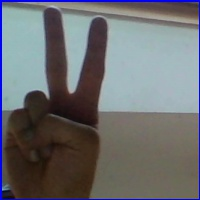

In [ ]:
!pip -q install mediapipe opencv-python smart-gestures

import cv2
import mediapipe as mp
from smart_gestures.alphabet.asl_model import ASLModel


mp_hands = mp.solutions.hands
mp_draw = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles


def get_hand_coords(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)
    result = hands.process(img_rgb)

    if not result.multi_hand_landmarks:
        return None, img

    hand_landmarks = result.multi_hand_landmarks[0]
    coords = [(lm.x, lm.y, lm.z) for lm in hand_landmarks.landmark]

    # draw landmarks on the image
    mp_draw.draw_landmarks(
        img, hand_landmarks, mp_hands.HAND_CONNECTIONS,
        mp_styles.get_default_hand_landmarks_style(),
        mp_styles.get_default_hand_connections_style()
    )

    return coords, img


def predict_letter(coords):
    if coords is None:
        return "No hand detected."

    model = ASLModel()

    landmarks = [{"x": x, "y": y, "z": z} for (x, y, z) in coords]
    return model.predict(landmarks)[0]


# Example Usage
from google.colab import files
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

coords, img_with_landmarks = get_hand_coords(img_path)
print(coords)

letter = predict_letter(coords)
print("Predicted Letter:", letter)

# Save & display the image with landmarks
output_path = "hand_landmarks.png"
cv2.imwrite(output_path, img_with_landmarks)
print("Saved landmark image to:", output_path)

from IPython.display import Image, display
display(Image(output_path))


In [ ]:
#!/usr/bin/env python3
"""webcam_mediapipe_tflite.py

Real-time webcam loop: MediaPipe Holistic -> sliding window -> TFLite inference -> simple decoding

Usage:
  python webcam_mediapipe_tflite.py --model model.tflite --labels labels.txt

Notes:
 - This script attempts to be flexible about TFLite input shapes. Adjust `WINDOW_SIZE`, `STRIDE`, and normalization to match your training.
 - Update LABELS file to match the model's output vocabulary (one token per line). If the model uses a blank token for CTC, include it in labels.

"""

import argparse
import time
from collections import deque

import cv2
import numpy as np

# Try to import tflite runtime (smaller) then fallback to TF's Interpreter
try:
    import tflite_runtime.interpreter as tflite
except Exception:
    try:
        from tensorflow.lite import Interpreter as tflite
    except Exception:
        raise RuntimeError("Neither tflite_runtime nor tensorflow.lite is available. Install one of them.")

import mediapipe as mp


# ----------------------------- Configuration -----------------------------
WINDOW_SIZE = 64  # number of frames in sliding window (adjust to model)
STRIDE = 4        # how many frames between inferences (lower = more frequent)
STABILITY_VOTES = 3  # require same char this many consecutive times before committing

# MediaPipe landmark ordering assumed here:
# pose (33), face (468), left_hand (21), right_hand (21) = 543 landmarks
POSE_N = 33
FACE_N = 468
HAND_N = 21
TOTAL_LANDMARKS = POSE_N + FACE_N + HAND_N + HAND_N

# -------------------------------------------------------------------------


def load_labels(path):
    with open(path, 'r', encoding='utf-8') as f:
        labels = [l.strip() for l in f.readlines() if l.strip()]
    return labels


class TFLiteModel:
    def __init__(self, model_path):
        self.interpreter = tflite.Interpreter(model_path=model_path)
        self.interpreter.allocate_tensors()
        self.input_details = self.interpreter.get_input_details()
        self.output_details = self.interpreter.get_output_details()

    def infer(self, input_array):
        # input_array should be a numpy array with dtype float32 matching model's expected shape
        inp = input_array.astype(np.float32)
        # support single input
        idx = self.input_details[0]['index']
        self.interpreter.set_tensor(idx, inp)
        self.interpreter.invoke()
        outputs = [self.interpreter.get_tensor(o['index']) for o in self.output_details]
        return outputs


# ----------------------------- Preprocessing -----------------------------

def extract_holistic_landmarks(results):
    """Return ndarray (TOTAL_LANDMARKS, 3) with order: pose, face, left_hand, right_hand.
    If a set is missing, zeros are used.
    MediaPipe coordinates are normalized [0..1] w.r.t image; we keep them and convert later.
    """
    out = np.zeros((TOTAL_LANDMARKS, 3), dtype=np.float32)
    i = 0

    # pose
    if results.pose_landmarks:
        for lm in results.pose_landmarks.landmark:
            out[i, :] = [lm.x, lm.y, lm.z]
            i += 1
    else:
        i += POSE_N

    # face
    if results.face_landmarks:
        for lm in results.face_landmarks.landmark:
            out[i, :] = [lm.x, lm.y, lm.z]
            i += 1
    else:
        i += FACE_N

    # left hand
    if results.left_hand_landmarks:
        for lm in results.left_hand_landmarks.landmark:
            out[i, :] = [lm.x, lm.y, lm.z]
            i += 1
    else:
        i += HAND_N

    # right hand
    if results.right_hand_landmarks:
        for lm in results.right_hand_landmarks.landmark:
            out[i, :] = [lm.x, lm.y, lm.z]
            i += 1
    else:
        i += HAND_N

    return out


def normalize_sequence(seq):
    """Normalize a sequence of shape (T, N, 3).
    This performs:
      - translate so root (pose landmark 0 if present) is at origin per frame
      - scale by torso size (shoulder dist) average across frames
    Adjust to match your model's training pipeline exactly.
    """
    seq = seq.copy()
    T, N, C = seq.shape
    # if pose 0 exists, it's typically the nose or pelvis; many models use mid-shoulder.
    # We'll try to compute shoulder distance if pose landmarks available.
    # Indices for shoulders in MediaPipe Pose: 11 (left shoulder), 12 (right shoulder)
    pose_offset = seq[:, 0, :].copy()  # fallback
    left_sh_idx = 11
    right_sh_idx = 12
    if N >= POSE_N:
        # compute center as midpoint of shoulders if not zero
        left = seq[:, left_sh_idx, :]
        right = seq[:, right_sh_idx, :]
        mid = (left + right) / 2.0
        # where shoulders are zero (not detected), fallback to pose[0]
        mask = np.logical_or(np.all(left == 0, axis=1), np.all(right == 0, axis=1))
        pose_offset = mid
        pose_offset[mask] = seq[mask, 0, :]

    # translate
    seq = seq - pose_offset[:, None, :]

    # scale: average shoulder dist across frames
    shoulders = seq[:, left_sh_idx, :] - seq[:, right_sh_idx, :]
    d = np.linalg.norm(shoulders, axis=1)
    # avoid zero
    mean_d = np.mean(d[np.where(d > 1e-6)]) if np.any(d > 1e-6) else 1.0
    seq = seq / (mean_d + 1e-8)

    return seq


# ----------------------------- Decoding ---------------------------------

def ctc_greedy_decode(argmax_seq, labels, blank_id=None):
    """Simple CTC collapse: remove consecutive duplicates and blanks.
    argmax_seq: 1D array of indices (time)
    labels: list of labels where index -> token
    blank_id: int index representing blank (if None, we'll try to detect by empty string in labels)
    """
    if blank_id is None:
        try:
            blank_id = labels.index('')
        except ValueError:
            # fallback: last token is blank
            blank_id = len(labels) - 1

    out = []
    prev = None
    for idx in argmax_seq:
        if idx == prev:
            prev = idx
            continue
        if idx != blank_id:
            out.append(labels[idx])
        prev = idx
    return ''.join(out)


# ----------------------------- Main loop --------------------------------

def main(args):
    labels = load_labels(args.labels)
    model = TFLiteModel(args.model)

    # read model expected input shape to adapt
    in_shape = model.input_details[0]['shape']
    in_dtype = model.input_details[0]['dtype']
    print(f"Model input shape: {in_shape}, dtype: {in_dtype}")

    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        raise RuntimeError("Cannot open webcam")

    mp_holistic = mp.solutions.holistic
    holistic = mp_holistic.Holistic(static_image_mode=False,
                                    model_complexity=1,
                                    enable_segmentation=False,
                                    refine_face_landmarks=True,
                                    min_detection_confidence=0.5,
                                    min_tracking_confidence=0.5)

    buffer = deque(maxlen=WINDOW_SIZE)
    last_infer = 0
    vote_buffer = deque(maxlen=STABILITY_VOTES)
    committed_text = ""

    try:
        frame_idx = 0
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = holistic.process(img)

            lm = extract_holistic_landmarks(results)  # (TOTAL_LANDMARKS, 3)
            buffer.append(lm)

            # draw small overlay
            cv2.putText(frame, 'Press q to quit', (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

            if len(buffer) == WINDOW_SIZE and (frame_idx - last_infer) >= STRIDE:
                last_infer = frame_idx
                seq = np.stack(buffer, axis=0)  # (T, N, 3)
                seq = normalize_sequence(seq)

                # prepare input according to tflite shape
                # common expected shapes: (1, T, N, 3) or (1, T, N*3) or (1, N, T, 3) etc.
                target_shape = in_shape.copy()
                # replace dynamic dims (-1) with actuals
                for i in range(len(target_shape)):
                    if target_shape[i] == -1:
                        if i == 0:
                            target_shape[i] = 1
                        elif i == 1:
                            target_shape[i] = WINDOW_SIZE
                        else:
                            # try keep as is
                            target_shape[i] = seq.size

                # build candidate arrays and try to match ordering
                # common mapping: (1, T, N, 3)
                candidate = seq[None, :, :, :].astype(np.float32)
                # other candidate: flattened per frame
                flat_candidate = seq.reshape((1, WINDOW_SIZE, -1)).astype(np.float32)

                # choose which to feed based on total size
                if np.prod(candidate.shape) == np.prod(target_shape):
                    feed = candidate
                elif np.prod(flat_candidate.shape) == np.prod(target_shape):
                    feed = flat_candidate
                else:
                    # attempt to reshape candidate to target
                    try:
                        feed = candidate.reshape(target_shape).astype(np.float32)
                    except Exception:
                        try:
                            feed = flat_candidate.reshape(target_shape).astype(np.float32)
                        except Exception:
                            # final fallback: resize flattened to required size (may be wrong)
                            feed = np.zeros(tuple(target_shape), dtype=np.float32)
                            flat = flat_candidate.flatten()
                            flat = np.pad(flat, (0, max(0, flat.size - flat.size)), mode='constant')
                            flat = flat[:feed.size]
                            feed = flat.reshape(feed.shape)

                outputs = model.infer(feed)
                # try to interpret outputs
                # common shapes: logits (1, T_out, V) or (1, V)
                out = outputs[0]
                if out.ndim == 3:
                    # time major
                    argmax_seq = np.argmax(out[0], axis=1)
                elif out.ndim == 2:
                    argmax_seq = np.argmax(out[0], axis=1)
                elif out.ndim == 1:
                    argmax_seq = np.argmax(out)
                else:
                    argmax_seq = np.argmax(out.reshape((out.shape[0], -1)), axis=1)

                # CTC-style collapse
                decoded = ctc_greedy_decode(argmax_seq.tolist(), labels, blank_id=None)

                # stability voting
                vote_buffer.append(decoded)
                # if stable
                if len(vote_buffer) == STABILITY_VOTES and len(set(vote_buffer)) == 1:
                    if decoded != '':
                        committed_text += decoded

            # draw committed text
            cv2.putText(frame, committed_text, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 2)

            cv2.imshow('webcam', frame)
            key = cv2.waitKey(1) & 0xFF
            if key == ord('q'):
                break
            frame_idx += 1

    finally:
        cap.release()
        cv2.destroyAllWindows()


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--model', required=True, help='Path to .tflite model')
    parser.add_argument('--labels', required=True, help='Path to labels.txt (one label per line)')
    args = parser.parse_args()
    main(args)


RuntimeError: Neither tflite_runtime nor tensorflow.lite is available. Install one of them.

In [ ]:
!pip install tensorflow